In [47]:
import projet
import numpy as np





# 1- Apprentissage des paramètres d’un modèle à partir de données



In [48]:

tabData = np.loadtxt("data_exo1.txt") #Tableau des données de 'data_exo1.txt'

matrix = projet.estimMatriceProbaTransi(tabData) #Matrice de probabilités de transition de tabData

### Question 1.1

A partir de cette séquence d’observation, estimez les probabilités de transition entre les états et
dresser la matrice de probabilité de transitions.

#### PROBABILITE

->P(S->S) = $\frac{2}{3}$, P(S->I) = $\frac{1}{3}$,P(S->R) = 0
    
->P(I->S) = 0,  P(I->I) = $\frac{5}{6}$, P(I->R) = $\frac{1}{6}$, 

->P(R->X) = 0,  pour tout  X appartenant à {S,I,R}


#### MATRICE DE TRANSITIONS

\begin{pmatrix} \frac{2}{3} & \frac{1}{3} & 0 \\ 0 & \frac{5}{6} & \frac{1}{6} \\ 0 & 0 & 0\end{pmatrix}





### Question 1.2

Estimez les probabilités de transition entre les états et dressez la matrice de probabilité de transitions.

In [49]:
#Reponse
projet.estimMatriceProbaTransi(tabData)

[[0.924357034795764, 0.07564296520423601, 0.0],
 [0.0, 0.9352750809061489, 0.06472491909385113],
 [0.0, 0.0, 1.0]]

# 2 Description du premier modèle

### Question 1
A partir du graphe de transition, créez la matrice de transition A, la matrice contenant les probabilités
de transition entre les différents états.

#### MATRICE DE TRANSITIONS

\begin{pmatrix} 0.92 & 0.08 & 0.0 \\ 0.0 & 0.93 & 0.07\\ 0.0 & 0.0 & 1.0\end{pmatrix}


In [50]:
A = [[0.92, 0.08, 0.0],
 [0.0, 0.93, 0.07],
 [0.0, 0.0, 1.0]]

Créez une fonction permettant de vérifier qu’une matrice est
stochastique.


In [51]:
projet.isStochMat(A)

True

In [52]:
#Exemple de matrice non stochastique
Aexemple = [[0.92, 0.08, 0.0],
 [0.0, 0.93, -0.07],
 [0.0, 0.0, 1.0]] 

projet.isStochMat(Aexemple)

False

In [53]:
#Exemple de matrice non stochastique
Aexemple = [[0.92, 0.08, 0.0],
 [0.0, 0.93, 0.07],
 [0.0, 0.01, 1.0]] 

projet.isStochMat(Aexemple)

False

### Question 2 

Créez π0 la distribution de probabilité initiale.

In [54]:
pi0 = {0 : 0.9, 1 : 0.1, 2 : 0.0} #π0

## Distribution

### Question 1

En utilisant π0 et A, donnez la probabilité pour un individu d’être sain, infecté ou guéri au temps t = 1 

In [55]:
#REPONSE

#Cette fonction donne la probabilité pour un individu d’être sain, infecté ou guéri au temps t = 1.
projet.getTime1Prob(pi0,A)

#{0: 0.8280000000000001, 1: 0.16500000000000004, 2: 0.007000000000000001}

{0: 0.8280000000000001, 1: 0.16500000000000004, 2: 0.007000000000000001}

### Question 2

De même pour chaque temps t entre 1 et 200, calculez la distribution théorique des effectifs dans
chaque état

In [56]:
#REPONSE

for i in range(1,201):
    print("\n")
    print("Temps = " + str(i))
    print(projet.getTimeTProb(pi0,A,i))




Temps = 1
{0: 0.9, 1: 0.1, 2: 0.0}


Temps = 2
{0: 0.8280000000000001, 1: 0.16500000000000004, 2: 0.007000000000000001}


Temps = 3
{0: 0.7617600000000001, 1: 0.21969000000000005, 2: 0.018550000000000004}


Temps = 4
{0: 0.7008192000000001, 1: 0.26525250000000006, 2: 0.03392830000000001}


Temps = 5
{0: 0.6447536640000001, 1: 0.3027503610000001, 2: 0.052495975000000014}


Temps = 6
{0: 0.5931733708800001, 1: 0.3331381288500001, 2: 0.07368850027000003}


Temps = 7
{0: 0.5457195012096001, 1: 0.3572723295009001, 2: 0.09700816928950004}


Temps = 8
{0: 0.5020619411128321, 1: 0.3759208265326051, 2: 0.12201723235456305}


Temps = 9
{0: 0.46189698582380556, 1: 0.3897713239643494, 2: 0.14833169021184542}


Temps = 10
{0: 0.42494522695790116, 1: 0.3994390901527494, 2: 0.17561568288934987}


Temps = 11
{0: 0.39094960880126906, 1: 0.40547397199868906, 2: 0.20357641920004232}


Temps = 12
{0: 0.35967364009716757, 1: 0.4083667626628824, 2: 0.23195959723995058}


Temps = 13
{0: 0.33089974888939416

### Question 3

Représentez graphiquement la probabilité d’être dans chaque état en fonction du temps.

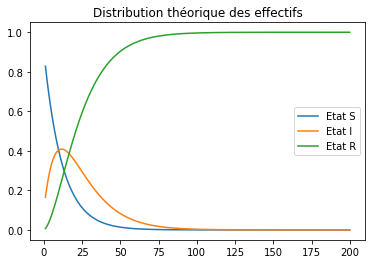

In [57]:
projet.tracerTheoriqueGraphique(pi0, A,200)

#Les valeurs de distributions sont en pourcentage compris entre 0 et 1

#### COMMENTAIRES

On voit que le nombres de personnes guéries croît vers 100%. 
Le nombre de personnes saines et infectées tend vers 0%.
Ces valeurs sont atteint à peu près à t = 75.
Les valeurs à l'initialisation sont logiques par rapport à pi0.
Le nombres de personnes infectées atteint un pic au moment t où il y a autant de personnes guéries que de saines. Elle décroît ensuite pour atteindre 0%.

## Tirage aléatoire des états

Vous allez générer une séquence de taille T en utilisant cette chaîne de Markov. Pour générer une
séquence aléatoire, choisissiez un état initial au hasard (en utilisant π0) ; puis choisissez les états suivants
en suivant les probabilités de transition (= la matrice de transition A).
Vous pouvez prendre T=150.

In [58]:
# Génération d'une séquence aléatoire de taille T = 150
listeEtat = projet.randomDraw(pi0,A,150)
print(listeEtat)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [59]:
#la sequence de Taille T prècèdente correspond à cette suite d'état
chaine = ""
for etat in listeEtat:
    if(etat == 0):
        chaine += "S"
    elif(etat == 1):
        chaine += "I"
    elif(etat == 2):
        chaine += "R"
chaine

'SSSSSSSSSSSIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR'

## Modélisation d’une population

### Question 1

A chaque temps t, comptez le nombre d’individus sains, infectés et guéris dans la population et
affichez l’évolution du nombre d’individus dans les trois états en fonction du temps.

In [60]:
numberOfIndiv = 200
T = 150
#tabStatsOnSequences contient la liste des nombres d'individus en fonction du temps
tabStatsOnSequences = projet.statsOnSequences(pi0,A,T,numberOfIndiv)
for i in range(1,T+1):
    print("\n")
    print("Temps : t = "+ str(i))
    print((tabStatsOnSequences)[i-1])



Temps : t = 1
{0: 180, 1: 20, 2: 0}


Temps : t = 2
{0: 172, 1: 25, 2: 3}


Temps : t = 3
{0: 158, 1: 36, 2: 6}


Temps : t = 4
{0: 144, 1: 46, 2: 10}


Temps : t = 5
{0: 131, 1: 59, 2: 10}


Temps : t = 6
{0: 121, 1: 66, 2: 13}


Temps : t = 7
{0: 109, 1: 76, 2: 15}


Temps : t = 8
{0: 103, 1: 77, 2: 20}


Temps : t = 9
{0: 97, 1: 77, 2: 26}


Temps : t = 10
{0: 90, 1: 73, 2: 37}


Temps : t = 11
{0: 87, 1: 67, 2: 46}


Temps : t = 12
{0: 81, 1: 71, 2: 48}


Temps : t = 13
{0: 77, 1: 71, 2: 52}


Temps : t = 14
{0: 70, 1: 73, 2: 57}


Temps : t = 15
{0: 64, 1: 74, 2: 62}


Temps : t = 16
{0: 60, 1: 74, 2: 66}


Temps : t = 17
{0: 57, 1: 70, 2: 73}


Temps : t = 18
{0: 50, 1: 76, 2: 74}


Temps : t = 19
{0: 44, 1: 79, 2: 77}


Temps : t = 20
{0: 42, 1: 75, 2: 83}


Temps : t = 21
{0: 39, 1: 71, 2: 90}


Temps : t = 22
{0: 35, 1: 68, 2: 97}


Temps : t = 23
{0: 30, 1: 71, 2: 99}


Temps : t = 24
{0: 28, 1: 69, 2: 103}


Temps : t = 25
{0: 24, 1: 67, 2: 109}


Temps : t = 26
{0: 21, 1:

### Question 2

Affichez le pourcentage d’indivudus sains infectés et guéris en fonction du temps.


In [61]:

for i in range(1,T+1):
    print("\n")
    print("Temps : t = "+ str(i))
    #Convertit tabStatsOnSequences en dictionnaire de pourcentage
    print((projet.fromStatsToPercentage(tabStatsOnSequences))[i-1])



Temps : t = 1
{0: 90.0, 1: 10.0, 2: 0.0}


Temps : t = 2
{0: 86.0, 1: 12.5, 2: 1.5}


Temps : t = 3
{0: 79.0, 1: 18.0, 2: 3.0}


Temps : t = 4
{0: 72.0, 1: 23.0, 2: 5.0}


Temps : t = 5
{0: 65.5, 1: 29.5, 2: 5.0}


Temps : t = 6
{0: 60.5, 1: 33.0, 2: 6.5}


Temps : t = 7
{0: 54.50000000000001, 1: 38.0, 2: 7.5}


Temps : t = 8
{0: 51.5, 1: 38.5, 2: 10.0}


Temps : t = 9
{0: 48.5, 1: 38.5, 2: 13.0}


Temps : t = 10
{0: 45.0, 1: 36.5, 2: 18.5}


Temps : t = 11
{0: 43.5, 1: 33.5, 2: 23.0}


Temps : t = 12
{0: 40.5, 1: 35.5, 2: 24.0}


Temps : t = 13
{0: 38.5, 1: 35.5, 2: 26.0}


Temps : t = 14
{0: 35.0, 1: 36.5, 2: 28.499999999999996}


Temps : t = 15
{0: 32.0, 1: 37.0, 2: 31.0}


Temps : t = 16
{0: 30.0, 1: 37.0, 2: 33.0}


Temps : t = 17
{0: 28.499999999999996, 1: 35.0, 2: 36.5}


Temps : t = 18
{0: 25.0, 1: 38.0, 2: 37.0}


Temps : t = 19
{0: 22.0, 1: 39.5, 2: 38.5}


Temps : t = 20
{0: 21.0, 1: 37.5, 2: 41.5}


Temps : t = 21
{0: 19.5, 1: 35.5, 2: 45.0}


Temps : t = 22
{0: 17.5, 1: 

#### Nous allons maintenant tracer le graphe théorique puis le graphe fait avec les simulations.

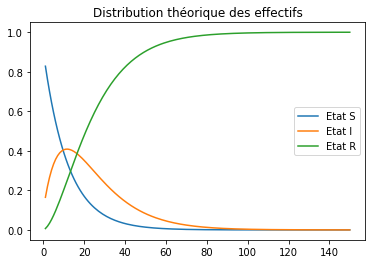

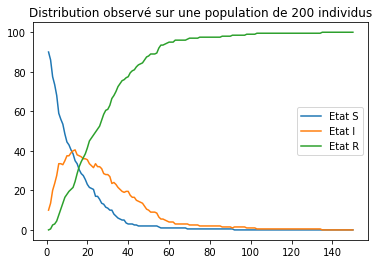

In [62]:
#GRAPHE THEORIQUE
projet.tracerTheoriqueGraphique(pi0,A,150) #T = 150

#GRAPHE AVEC SIMULATIONS (Avec 200 individus)
projet.tracerReelGraphique(pi0,A,150,200) #T = 150, 200 individus

On voit donc que les valeurs théoriques sont très proches des valeurs trouvés avec les simulations.

### Question 3
Quand t est grand, quelle est la proportion d’individus sains, infectés et guéris

#### REPONSE : 
        
#### On voit qu'à partir de t = 114, on a {S = 0.0 , I = 0.0 , R = 100.0}
        
#### Donc plus t augmente, plus le pourcentage de guéris tend vers 100. C'est-à-dire toute la population guérie et il n'y a plus d'infectés, ni de sains. Par conséquent , la population inféctée et saine tend vers 0

### Question 4 

Refaites les questions précédentes avec des populations de tailles différentes, 5 individus et 5000
individus par exemple.

#### Pour 5 individus

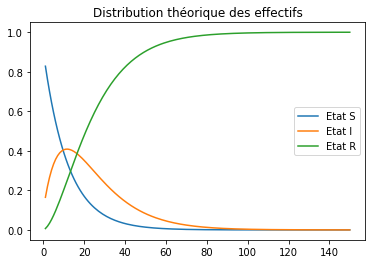

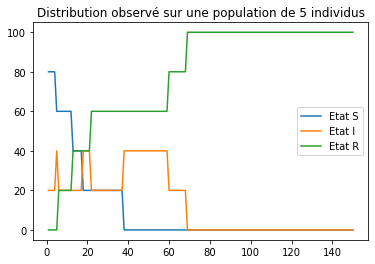

In [63]:
pi0 = {0: 0.9, 1: 0.1, 2: 0.0}  # π0
A = [[0.92, 0.08, 0.0],
     [0.0, 0.93, 0.07],
     [0.0, 0.0, 1.0]]

projet.tracerTheoriqueGraphique(pi0,A,T,5)# 5 individus
projet.tracerReelGraphique(pi0,A,T,5)# 5 individus


#### Pour 5000 individus

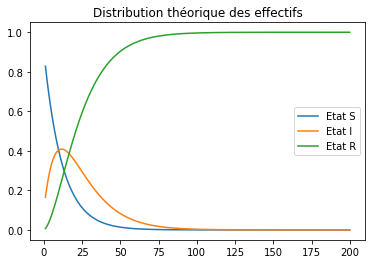

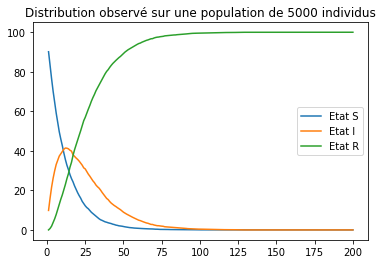

In [64]:
T = 200
projet.tracerTheoriqueGraphique(pi0,A,T,5000)# 5000 individus
projet.tracerReelGraphique(pi0,A,T,5000)# 5000 individus

#### CONCLUSION :

On remarque que peu importe le nombre d'individus étudié, la courbe de l'épidémie suit les mêmes variations. Les pourcentages d'individus sains et infectés tendent vers 0% et donc celui des individus guéris tend vers 100% (toute la population guérit).

Ceci est logique car l'état R est le seul état final et les états S et I sont transitifs (On ne peut y retourner une fois qu'on les a quitté.).

On peut également noter que plus l'échantillon (le nombre d'individus) est grand, plus la courbe théorique et réelle seront proches.


## Pic de l'épidémie

Au pic de l’épidémie, combien d’individus sont infectés ? A quel temps se produit le pic ?

In [65]:
#On remet T = 150 et numberOfIndiv = 200

numberOfIndiv = 200
T = 150
tabStatsOnSequences = projet.statsOnSequences(pi0,A,T,numberOfIndiv)


#Ce code récupère le nombre d'individus infectés maximum et le temps associé.
Tmax = 0
maxStateInfectePercentage = 0.0
#On parcourt le tableau pour avoir le pourcentage d'infectés maximum et le temps à cet instant qu'on appelera Tmax
for i in range(1,T+1):
    
    dicoStatsToPercentage = (projet.fromStatsToPercentage(tabStatsOnSequences))[i-1]
    
    if(maxStateInfectePercentage < dicoStatsToPercentage[1]):#On remplace par la nouvelle valeur de maxStateInfecte et on prend le T coresspondant
        maxStateInfectePercentage = dicoStatsToPercentage[1]
        Tmax = i

maxStateInfecteReel = (maxStateInfectePercentage/100.0) * numberOfIndiv #On convertit le pourcentage d'individu en sa valeur réelle
print("Le pic se produit au temps t = " + str(Tmax) + " et il y a " + str(int(maxStateInfecteReel))  + " infectés.")
    

Le pic se produit au temps t = 13 et il y a 79 infectés.


## Longueur de l’infection

### Question 1

À partir des simulations, estimez la longueur moyenne d’une séquence de I

In [66]:
#REPONSE 
#Fonction qui calcule le nombre de moyen de I lors d'une séquence simulées
projet.estimAvgStateSequence(pi0,A,5000,numberOfIndiv,1) #On prend T = 5000 pour avoir une bonne estimation

13.55

### Question 2

Calculez la longueur théorique d’une séquence de I en fonction de la probabilité de rester infecté, si
on est infecté au temps précédent.

#### REPONSE : 

Soit X la loi de la longueur théorique d’une séquence de I en fonction de la probabilité de rester infecté, si on est infecté au temps précédent.

#### X suit une loi géométrique de paramètre p = 0.07 (I->R), alors:
E(X) = $\frac{1}{p}$ = $\frac{1}{0.07}$ = 14.29

### Question 3

Affichez la distribution théorique et la distribution observée de la longueur d’infection.

### Reponse : 

#### Pour la valeur avec les simulations, nous avons trouvé 14.935, pour la théorique, nous avons trouvé 14.3. L'estimation est donc très proche de la valeur attendue.

# 3 Modèle ergodique

## Analyse du modèle

### Question 1

Créez la nouvelle matrice de transition, et les nouvelles simulations. Comment la population évoluet-elle si un individu guérit peut redevenir infecté ?

    
   A =   \begin{pmatrix} 0.92 & 0.08 & 0.0 \\ 0.0 & 0.93 & 0.07 \\ 0.02 & 0.0 & 0.98  \end{pmatrix}


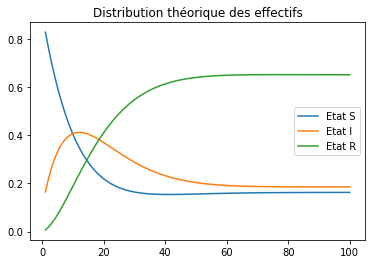

In [67]:
AErgodique = [[0.92, 0.08, 0.0],
 [0.0, 0.93, 0.07],
 [0.02, 0.0, 0.98]]



projet.tracerTheoriqueGraphique(pi0,AErgodique,100)

    

#### REPONSE : L'état R n'est plus un état terminal, les états I et S sont maintenants récurrents. Cela explique les nouvelles convergences.  



### Question 2
Refaites les simulations avec une autre distribution de probabilité initiale, par exemple si au temps
t = 0, nous avons 90% d’infectés et 10% de sains. Explorez d’autres initialisations et commentez
vos observations.

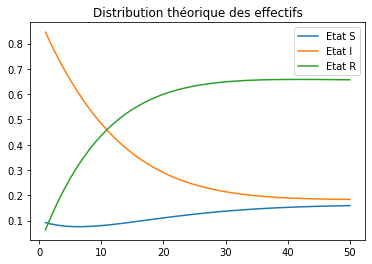

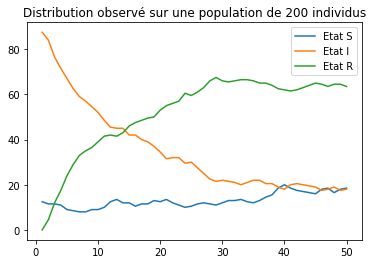

In [68]:
#On fait varier π0 et on analyse les courbes
numberOfIndiv = 200
π0bis = {0 : 0.1, 1 : 0.9, 2 : 0.0}
projet.tracerTheoriqueGraphique(π0bis,AErgodique,50)
projet.tracerReelGraphique(π0bis,AErgodique,50,numberOfIndiv)


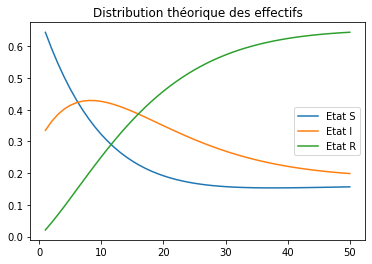

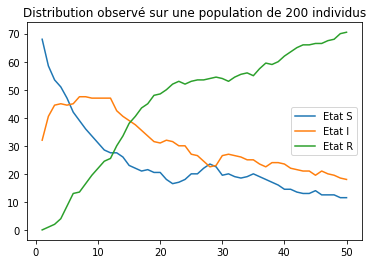

In [69]:

π2 = {0 : 0.7, 1 : 0.3, 2 : 0.0}
projet.tracerTheoriqueGraphique(π2,AErgodique,50)
projet.tracerReelGraphique(π2,AErgodique,50,numberOfIndiv)



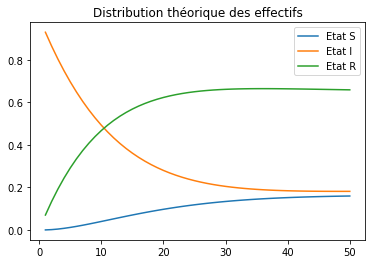

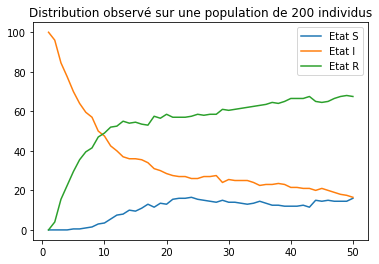

In [70]:
π3 = {0 : 0.0, 1 : 1.0, 2 : 0.0}
projet.tracerTheoriqueGraphique(π3,AErgodique,50)
projet.tracerReelGraphique(π3,AErgodique,50,numberOfIndiv)



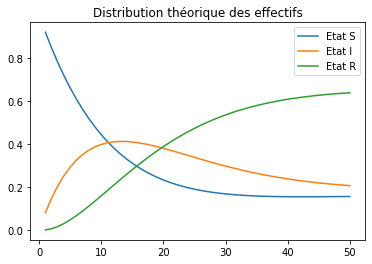

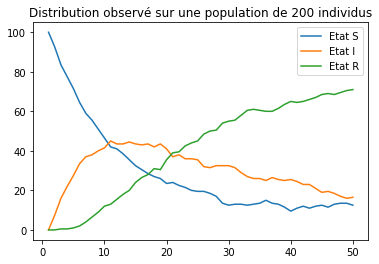

In [71]:
π4 = {0 : 1.0, 1 : 0.0, 2 : 0.0}
projet.tracerTheoriqueGraphique(π4,AErgodique,50)
projet.tracerReelGraphique(π4,AErgodique,50,numberOfIndiv)



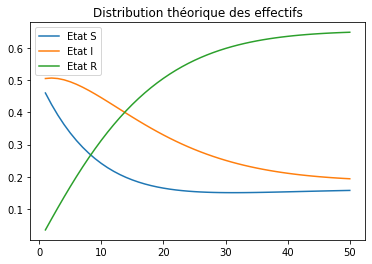

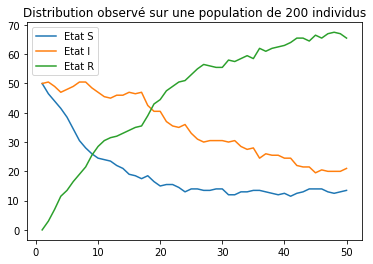

In [72]:
π5 = {0 : 0.5, 1 : 0.5, 2 : 0.0}
projet.tracerTheoriqueGraphique(π5,AErgodique,50)
projet.tracerReelGraphique(π5,AErgodique,50,numberOfIndiv)

### Reponse :

#### On remarque bien que le fait de changer les valeurs de pi0 ne change en rien la forme de la courbe. On aura toujours le pourcentage de personnes infectées et saines qui tenderont vers une valeur proche et celui des personnes guéries vers une valeur supérieure. 
#### La seule modification est le nombre initiales de personnes saines, infectées et guéries.
#### Cela nous montre que cette chaîne de Markov tend vers une distribution stationnaire.
#### On peut noter en plus qu'importe π0, le pourcentage de personnes guéries tend vers 60% et celui des personnes saines et inféctés vers 20 %.

### Question 3

Quels est la nature des états de cette chaîne de Markov ? Est-elle périodique ? Est-elle irréductible ?

#### REPONSE


#### Comme on l'a vu précédemment, les états de cette chaîne sont récurrents, On peut toujours revenir à un état en i étapes avec une probabilité non nulle.
#### La chaine n'est pas périodique (S a un lien avec lui-même par exemple), elle est aussi irréductible car tous les états sont récurrents.


### Question 4

Calculez la matrice A × A. A quoi correspond-elle ? Est elle stochastique ? Même question pour A3, A4, ect.

#### REPONSE



A * A =  \begin{pmatrix} 0.8528 & 0.148 & 0.056 \\ 0.014 & 0.8649 & 0.1337 \\ 0.038 & 0.0016 & 0.9604  \end{pmatrix}





#### Cette nouvelle matrice contient les probabilités de passer d'un état X à un état Y en 2 étapes.

#### La matrice est carrée et la somme des probabilités d'une ligne vaut bien 1 (en prenant en compte les arrondis qui enlèvent de la précision). 
#### Chaque élément dans une ligne est positif.
#### C'est donc une matrice stochastique.

#### Pour $A^{3}$, $A^{4}$, ..., $A^{n}$, on peut suivre le même raisonnement. Chaque matrice est stochastique et contient les probabilités de passer d'un état X à un état Y en n étapes


### Question 5

Calculez la distribution de probabilité stationnaire à partir de la matrice de transition, et comparez
ce résultat avec les simulations pour t assez grand.

### REPONSE :
On cherche π tel que :
π = π * A

On obtient donc le système suivant:

$π_{S}$ + $π_{I}$+ $π_{R}$ = 1 (1)

$π_{S}$ = 0.92 $π_{S}$ + 0.02 $π_{R}$ (2)

$π_{I}$ = 0.08 $π_{S}$ + 0.93 $π_{I}$ (3)

$π_{R}$ = 0.07 $π_{I}$ + 0.98 $π_{R}$ (4)

 On résout le système :


(3) : $π_{I}$ = $\frac{0.08}{0.07}$ $π_{S}$ = $\frac{8}{7}$ $π_{S}$

(4) : $π_{R}$ = $\frac{0.07}{0.02}$ $π_{I}$ = $\frac{7}{2}$ * $\frac{8}{8}$  $π_{S}$ = 4 $π_{S}$

(1) : $π_{S}$ + $\frac{8}{7}$ $π_{S}$ + 4 $π_{S}$ = 1 <=>  $\frac{43}{7}$ $π_{S}$ = 1 =>   $π_{S}$ = $\frac{7}{43}$, 
                                                                                           $π_{I}$ = $\frac{8}{43}$, 
                                                                                           $π_{R}$ = $\frac{28}{43}$     

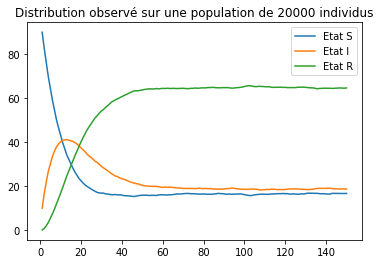

In [73]:
#Simulation pour T assez grand (T = 150) et numberOfIndiv = 20 000
projet.tracerReelGraphique(pi0,AErgodique,150,20000)


tabStatsOnSequences = projet.statsOnSequences(pi0,AErgodique,150,20000)


#### Sur le graphique, les valeurs ont l'air d'être semblables. Pour avoir une meilleure comparaison, nous allons afficher les pourcentages de t = 145 à t = 150

In [74]:
tabStatsOnSequences = projet.statsOnSequences(pi0,AErgodique,T,numberOfIndiv)

for i in range(145,151):
    print("\n")
    print("Temps : t = "+ str(i))
    print((projet.fromStatsToPercentage(tabStatsOnSequences))[i-1])



Temps : t = 145
{0: 12.0, 1: 18.0, 2: 70.0}


Temps : t = 146
{0: 13.0, 1: 18.0, 2: 69.0}


Temps : t = 147
{0: 13.5, 1: 17.5, 2: 69.0}


Temps : t = 148
{0: 14.000000000000002, 1: 17.5, 2: 68.5}


Temps : t = 149
{0: 15.0, 1: 17.0, 2: 68.0}


Temps : t = 150
{0: 14.000000000000002, 1: 18.5, 2: 67.5}


### REPONSE

On voit que les valeurs des simulations sont proches des valeurs théoriques trouvés ($π_{S}$ = $\frac{7}{43}$ = 16.3 %, 
                                                                                           $π_{I}$ = $\frac{8}{43}$ = 18.6 %, 
                                                                                           $π_{R}$ = $\frac{28}{43}$ = 65.1 %  )

## Longueur de l'immunité

### Question 1

À partir des simulations, estimez la longueur moyenne d’une séquence de R.

In [75]:
#On remet le π0

pi0 = {0 : 0.9, 1 : 0.1, 2 : 0.0} #π0

projet.estimAvgStateSequence(pi0,AErgodique,5000,numberOfIndiv,2)#On prend T = 5000 pour avoir une meilleur estimation

49.17512324611301

### Question 2

Calculez la longueur théorique d’une séquence de R

#### Soit X la loi de la longueur théorique d’une séquence de I en fonction de la probabilité de rester infecté, si on est infecté au temps précédent.

#### X suit une loi géométrique de paramètre p = 0.02 (R->S), alors:
#### E(X) = $\frac{1}{p}$ = $\frac{1}{0.02}$ = 50.0

#### Les valeurs théoriques et à partir des simulation sont très proches. L'estimation est donc fiable.

## Modifier le modèle

### Question 1

Comment l’épidémie évolue-t-elle si vous modifiez la probabilité pour un individu sain de devenir
infecté ? Quelle est la nouvelle distribution a l’équilibre ?

Nous allons maintenant modifier les probabilités de transition.
#### Nous allons diminuer la probabilité pour un individu sain de devenir infecté.

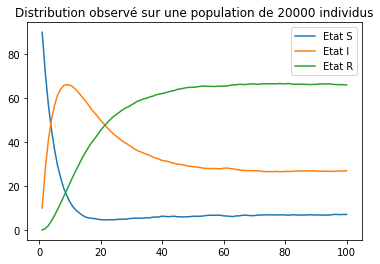

In [76]:
#On modifie la matrice
ATemp = [[0.8, 0.2, 0.0], #On passe de P(S->S) = 0.92 à P(S->S) = 0.8 (donc P(S->I = 0.2))
 [0.0, 0.95, 0.05],
 [0.02, 0.0, 0.98]]

projet.tracerReelGraphique(pi0,ATemp,100,20000)



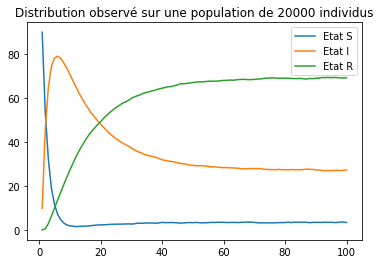

In [77]:
#On modifie la matrice
ATemp = [[0.6, 0.4, 0.0], #On passe de P(S->S) = 0.92 à P(S->S) = 0.6 (donc P(S->I = 0.4))
 [0.0, 0.95, 0.05],
 [0.02, 0.0, 0.98]]

projet.tracerReelGraphique(pi0,ATemp,100,20000)


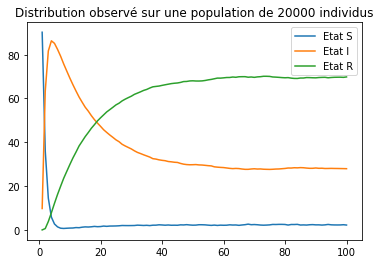

In [78]:
#On modifie la matrice
ATemp = [[0.4, 0.6, 0.0], #On passe de P(S->S) = 0.92 à P(S->S) = 0.4 (donc P(S->I = 0.6))
 [0.0, 0.95, 0.05],
 [0.02, 0.0, 0.98]]

projet.tracerReelGraphique(pi0,ATemp,100,20000)

On voit que plus on augmente la probabilité d'infection plus le nombre d'infectés croît rapidement au cours de temps. Le pic d'infection est donc plus vite atteint.

De plus, logiquement, plus le  la probabilité d'infection est élevée, plus le nombres d'individus à l'état sains diminue rapidement. 

On peut aussi noter que plus la probabilité d'infection est élevée, plus le pic d'individus infectés est élevé.

### Question 2

Même question si vous changez la probabilité pour un individu guéri de redevenir sain.

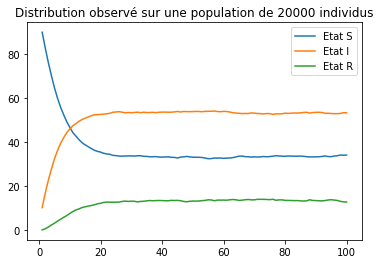

In [79]:
#On modifie la matrice
ATemp = [[0.92, 0.08, 0.0], #On passe de P(R->R) = 0.98 à P(R->R) = 0.8 (donc P(R->S = 0.2))
 [0.0, 0.95, 0.05],
 [0.2, 0.0, 0.8]]

projet.tracerReelGraphique(pi0,ATemp,100,20000)


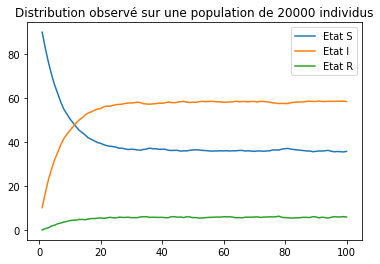

In [80]:
#On modifie la matrice
ATemp = [[0.92, 0.08, 0.0], #On passe de P(R->R) = 0.98 à P(R->R) = 0.5 (donc P(R->S = 0.5))
 [0.0, 0.95, 0.05],
 [0.5, 0.0, 0.5]]

projet.tracerReelGraphique(pi0,ATemp,100,20000)

### Conclusion :

On voit que plus l'on diminue P(R->R), plus le nombre de guéris aura une valeur stationnaire faible.

Par conséquent, les nombrent de personnes saines et infectées convergeront vers une valeur supérieure à celui des personnes guéris.

c'est la valeur de P(State->State) pour State = {S;I;R} qui indiquera la position des courbes lorsqu'elles auront atteint leurs valeurs stationnaires.

Celle qui aura la valeur la plus élevée sera la plus haute, celle qui aura la valeur la plus faible, sera la plus basse.

# 4 Confinement

### Question 1 

Faites les simulations pour une population assez grande, représentez l’évolution du nombre d’individus à chaque temps t (vous devriez voir des “vagues”), et notez les temps de confinement et de deconfinement

En moyenne, un confinement dure t = 13.4


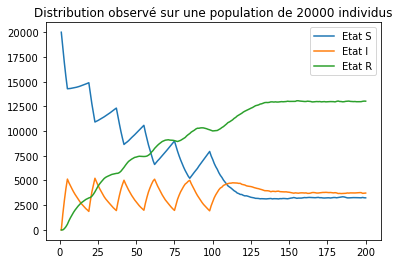

In [81]:
#On remet la matrice de la partie 3
AErgodique = [[0.92, 0.08, 0.0],
 [0.0, 0.95, 0.05],
 [0.2, 0.0, 0.98]]

pi0 = {0 : 0.9, 1 : 0.1, 2 : 0.0} #π0
projet.tracerReelGraphique(pi0,AErgodique,200,20000,True)

### Reponse :

On note qu'avant que les valeurs deviennent stationnaires, il faut 5 confinement/déconfinements.

# 5-Optionnel

## Quelles remarques critiques pouvez faire sur les modèles utilisés ?

Ce modèle a certaines limites qui ne le rendent pas applicable à la vie réelle:

-il ne prend pas en compte les personnes décédées suite à la maladie
    SOLUTION POSSIBLE: On pourrait créer un nouvel état M pour mort et qui aurait pour valeur 0 dans toute sa ligne de matrice et qui ne serait joignable que par l'état I.

-Ce modèle considère que la probabilité d'être infecté est constamment la même. Or nous n'avons pas les mêmes chances d'être contaminés si il y a 5% de personnes infectées ou 50 % de personnes infectées.
    SOLUTION POSSIBLE: faire évoluer la matrice de transition. La valeur de P(S->I) serait égale au pourcentage de personnes inféctées. Ainsi, nous aurions une meilleure visibilité de l'évolution.
    
-Ce modèle rend l'épidémie infinie. C'est à dire qu'une fois les valeurs stationnaires obtenues. Le nombre des personnes infectés, guéries et saines restera le même. Or une pandémie peut également s'arrêter.
    SOLUTION POSSIBLE: Une fois un seuil faible de personnes infectés atteint (5% par exemple), on peut changer la probabilité d'infection à 0. Ainsi on aurait un arrêt possible de l'épidémie.